***Lexic Analizer***

The main goal of this project is to create the dictionary of all notional words of Jack London's Martin Eden with its frequencies starting from the most frequent one and to visualize the result.

In [20]:
import nltk 
from nltk.corpus import stopwords #nltk module, to apply stop-words 
from nltk.tag import pos_tag #nltk module, to sort words into classes
from nltk.tokenize import RegexpTokenizer #nltk module, to tokenize our data before applying pos tagger
from nltk.stem import PorterStemmer #nltk module, stems all words
import matplotlib.pyplot as plt #matplotlib to visualize the data as pie chart

In [42]:
#In order to get the dictionary of only notional words we have to prepare our data. 
#Here the function tags all the words and deletes some of the classes that we do not need. 
#After that it deletes all functional words.


def preprocessing(s):
    martineden = open('London Jack. Martin Eden.txt').read() #opens the file in reading mode
    tokenizer = RegexpTokenizer(r'\w+') 
    toks = tokenizer.tokenize(martineden)#splits our data into tokens and  deletes all punctuation, leaves the uppercased letters
    tags = nltk.pos_tag(toks) #splits tokens into classes

    n_tokens = [] #empty dictionary for new tokens after deleting what we do not need

    for i in tags:
        if 'NNP' in i[1]: #ignores proper names
            continue
        elif 'PRP' in i[1]:#ignores pronouns
            continue
        elif 'MD' in i[1]: #ignores modal verbs
            continue
        elif 'CD' in i[1]: #ignores numerals
            continue
        else:
            n_tokens.append(i[0]) #adds everything else in new list
            
    stop_words = set(stopwords.words('english')) #identifies the language of stop words
    
    n_str = ' '.join(n_tokens) #we make our data a string again to make everything lowercase now because stop words finds only fully lowercased words 
    n = n_str.lower().strip().split() 

    new_tokens = [] #new list for words without stop words
    
    for word in n: 
        if word not in stop_words: #adds words if they are not in stop word list
            new_tokens.append(word) 
          
            
    return new_tokens #function returns the last list
        
print (preprocessing((open('London Jack. Martin Eden.txt').read())))

['chapter', 'one', 'opened', 'door', 'latch', 'key', 'went', 'followed', 'young', 'fellow', 'awkwardly', 'removed', 'cap', 'wore', 'rough', 'clothes', 'smacked', 'sea', 'manifestly', 'place', 'spacious', 'hall', 'found', 'know', 'cap', 'stuffing', 'coat', 'pocket', 'took', 'act', 'done', 'quietly', 'naturally', 'awkward', 'young', 'fellow', 'appreciated', 'understands', 'thought', 'see', 'right', 'walked', 'heels', 'swing', 'shoulders', 'legs', 'spread', 'unwittingly', 'level', 'floors', 'tilting', 'sinking', 'heave', 'lunge', 'sea', 'wide', 'rooms', 'seemed', 'narrow', 'rolling', 'gait', 'terror', 'lest', 'broad', 'shoulders', 'collide', 'doorways', 'sweep', 'bric', 'brac', 'low', 'mantel', 'recoiled', 'side', 'side', 'various', 'objects', 'multiplied', 'hazards', 'reality', 'lodged', 'mind', 'grand', 'piano', 'centre', 'table', 'piled', 'high', 'books', 'space', 'half', 'dozen', 'walk', 'abreast', 'yet', 'essayed', 'trepidation', 'heavy', 'arms', 'hung', 'loosely', 'sides', 'know', '

In [43]:
#This function stems all words using nltk module. 
#We need it because we want to find the real number of how many times the word is used in the book.
#Without stemming the programm will count several forms of one word as two separate. 
def stemming(x):
    martineden = open('London Jack. Martin Eden.txt').read()
    n = preprocessing(martineden)
    
    s = PorterStemmer() #stemming function
    
    l = [] #list for stemmed words

    for word in n:
        l.append(s.stem(word))
    return l #function returns our new stemmed list    
    
print(stemming('London Jack. Martin Eden.txt'))

['chapter', 'one', 'open', 'door', 'latch', 'key', 'went', 'follow', 'young', 'fellow', 'awkwardli', 'remov', 'cap', 'wore', 'rough', 'cloth', 'smack', 'sea', 'manifestli', 'place', 'spaciou', 'hall', 'found', 'know', 'cap', 'stuf', 'coat', 'pocket', 'took', 'act', 'done', 'quietli', 'natur', 'awkward', 'young', 'fellow', 'appreci', 'understand', 'thought', 'see', 'right', 'walk', 'heel', 'swing', 'shoulder', 'leg', 'spread', 'unwittingli', 'level', 'floor', 'tilt', 'sink', 'heav', 'lung', 'sea', 'wide', 'room', 'seem', 'narrow', 'roll', 'gait', 'terror', 'lest', 'broad', 'shoulder', 'collid', 'doorway', 'sweep', 'bric', 'brac', 'low', 'mantel', 'recoil', 'side', 'side', 'variou', 'object', 'multipli', 'hazard', 'realiti', 'lodg', 'mind', 'grand', 'piano', 'centr', 'tabl', 'pile', 'high', 'book', 'space', 'half', 'dozen', 'walk', 'abreast', 'yet', 'essay', 'trepid', 'heavi', 'arm', 'hung', 'loos', 'side', 'know', 'arm', 'hand', 'excit', 'vision', 'arm', 'seem', 'liabl', 'brush', 'book'

In [44]:
#This function creates a dictionary sorted by value starting from the most frequent one.

def word_dict(y):
    martineden = open('London Jack. Martin Eden.txt').read()
    stems = stemming(martineden)
    counts = {}
    
    for word in stems:
        counts[word] = counts.get(word, 0) + 1 #creates dictionary with words and their counts
        
    d = {}
    fd= {}
        
    for k, v in counts.items(): #sorts dictionary and deletes everything what is used less or equal 235  times. 
        if v<=235: 
            continue 
        else:
            d[k] = v
            
    sorted_d = sorted(d.items() , reverse=True, key=lambda x: x[1]) #sorts everything by frequency and creates list of tuples with word and count
        
    
    for element in sorted_d: #creates new dictionary, since this is the file type that we need in order to visualize it properly
        fd[element[0]] = element[1] 
        
    return fd #returnes sorted dictionary
    

print(word_dict('London Jack. Martin Eden.txt'))

{'time': 346, 'know': 341, 'like': 339, 'work': 303, 'love': 296, 'said': 289, 'day': 283, 'thought': 277, 'thing': 255, 'man': 254, 'eye': 251, 'hand': 243, 'life': 243, 'read': 241, 'never': 238}


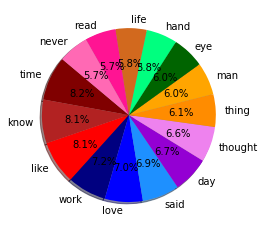

None


In [32]:
#Visualizes our dictionary as a pie chart

def pie_chart(t):
    martineden = open('London Jack. Martin Eden.txt').read()
    inp = word_dict(martineden)
    sizes = inp.values() #sizes equal  values
    labels = inp.keys() #labels equal keys
    colors = ['maroon','firebrick', 'red', 'navy', 'blue', 'dodgerblue', 'darkviolet', 'violet', 'darkorange', 'orange', 'darkgreen', 'springgreen', 'chocolate', 'deeppink', 'hotpink']

    plt.pie(sizes, labels=labels, colors=colors,
    autopct='%1.1f%%', shadow=True, startangle=140) #sets the parameters

    return plt.show() 
    
print(pie_chart('London Jack. Martin Eden.txt'))

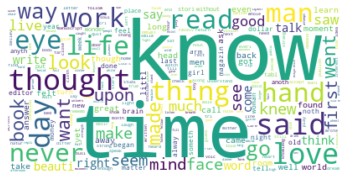

None


In [35]:
#Bonus: represents data as a word cloud

def wordcloud(k):
    from wordcloud import WordCloud 

    martineden = open('London Jack. Martin Eden.txt').read()
    new_t = stemming(martineden) #here the input is stemmed words
    new_s = ' '.join(new_t) #the data should be a string type

    cloud = WordCloud(background_color="white", max_words=500) #sets parameters

    cloud.generate(new_s) #generates

    plt.imshow(cloud, interpolation='bilinear') #output visualization
    plt.axis("off") #no axis
    return plt.show() 

print(wordcloud('London Jack. Martin Eden.txt'))